## Example 9.4: Correct the "bad" results with the 5% error of Example 9.3. 

The "bad" results vary linearly with $r$ for large $r$. Fit the last few points of the numerical solution to the form:

$\phi = mr + b$,

and subtract $mr$ from the numerical results to reinstate the appropriate large-$r$ behavior.

Solution: Let's again copy the results of Example 9.3 as a starting point. We will perform a fit of $\phi$ and subtract the $mr$ part from the result. 

In [19]:
import numpy as np
from scipy.optimize import curve_fit

# Numerov's algorithm (forward)
# takes as input the initial conditions y(0) and y(h) as y0 and y1, respectively
# h is the step size, the k-squared term (k2), the S term -- these are FUNCTIONS!
# the initial value of the independent variable x0, and the final value xf
# returns t,y as the solution arrays
def Numerov2(k2, S, y0, y1, h, x0, xf):
    """Returns the solution to a 2nd-order ODEs of the type: y'' + k^2 y = S(x) via the Numerov algorithm"""
    # the number of steps:
    N = int( (xf-x0)/h ) # needs to be an integer
    # define the numpy arrays to return
    ya = np.zeros(N+1)
    xa = np.zeros(N+1)
    # set the first two values of the arrays:
    ya[0] = y0
    ya[1] = y1
    xa[0] = x0
    xa[1] = x0 + h
    # integrate via the Numerov algo:
    for n in range(1,N):
        x = x0 + n*h
        xa[n]=x
        h2dt = h**2/12 # appears often so let's just calculate it once!
        ya[n+1] = (2 * (1 - 5*h2dt * k2(x)) * ya[n] - (1 + h2dt *k2(x-h)) * ya[n-1] + h2dt*(S(x+h) + 10 * S(x) + S(x-h)))/((1 + h2dt * k2(x+h) ))    
    xa[N] = xf # set the last x value which is not set in the loop
    return xa,ya

# Implement the functions specific to our equation: 
def k2func(x):
    """The k-squared function corresponding to the differential equation"""
    return 0.

def Sfunc(x):
    """The source term S(x) corresponding to the differential equation"""
    return - 0.5 * x * np.exp(-x)

# the exact solution:

def yexact(x):
    """The exact solution to the Poisson equation for Example 9.2"""
    return 1 - 0.5 * (x + 2) * np.exp(-x)

# SOLVE the equation:
# the step size
h = 1E-1
# final point:
xf = 20
# Set the initial conditions 
x0 = 0
y0 = 0
y1 = yexact(h)

# Call the function:
xsol, ysol = Numerov2(k2func, Sfunc, y0, y1, h, x0, xf)

# Now rescale y1 to 0.95 its real value: 
xsol, ysol2 = Numerov2(k2func, Sfunc, y0, 0.95*y1, h, x0, xf)

# perform a linear fit of the last 10 points:
yfit = ysol2[len(ysol)-10:]
xfit = xsol[len(ysol)-10:]

# the linear function for the least-squares fit:
def linear(x, m, b):
    """The linear function to fit"""
    return m*x + b

# fit the last few terms here:
popt, pcov = curve_fit(linear, xfit, yfit)
print(popt)
# "correct" the data:
ysol2_corrected = ysol2-popt[0] * xsol

[-0.02495974  0.99999888]


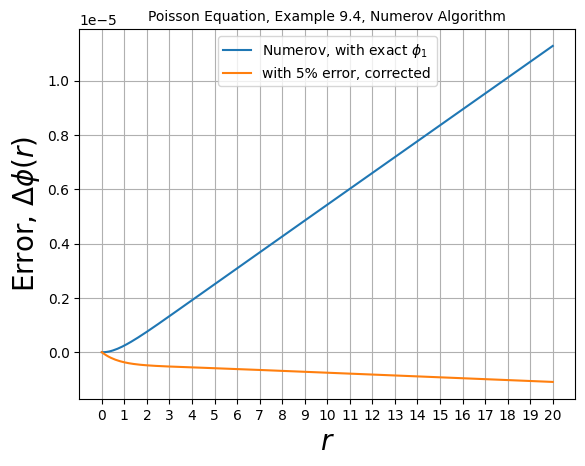

In [22]:
# Let's plot:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np
from math import pi
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$r$', fontsize=20) # set the x label
ax.set_ylabel(r'Error, $\Delta \phi(r)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Poisson Equation, Example 9.4, Numerov Algorithm', fontsize=10) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(xsol, ysol-yexact(xsol), label=r'Numerov, with exact $\phi_1$') 
ax.plot(xsol, ysol2_corrected-yexact(xsol), label='with 5% error, corrected') 


# set the ticks
ax.set_xticks(range(21))
ax.grid()

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here

The error is even more accurate at large $r$ than the uncorrected found when the exact value of $\phi_1$ is used to start the integration!